# 폐병수술 (Thoracic Sugery)
- 수술 후 생존1 인지 사망 0인지 분류
- 은닉층을 여러개 층으로 
- 학습과정 시각화

In [1]:
from google.colab import  files
uploaded = files.upload()

Saving ThoracicSurgery.csv to ThoracicSurgery.csv


In [2]:
filename = list(uploaded.keys())[0]
filename

'ThoracicSurgery.csv'

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(filename, header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


- Train / Test 데이터셋 만들기

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.values[:, :-1], df.values[:, -1], stratify=df.values[:, -1], random_state=2022
)

- 모델정의

In [6]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

```
# 기존정의
model2 = Sequential()
model2.add(Dense(30, input_dim=17, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

```

In [8]:
# 이미지의 여러차원 보통 쉐입을 많이 쓰고, 1차원의 피쳐만 여러개 들어올때 input dim 쓸때 많아
model = Sequential([
        Dense(24, input_shape=(17,), activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')                 
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                432       
                                                                 
 dense_1 (Dense)             (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


- 모델실행환경 설정 compile

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

모델학습 : 과정을 시각화하려면 history를 정의해야함

In [10]:
his = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=50, batch_size = 40)

Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 8.1487 - accuracy: 0.8577 - val_loss: 7.1303 - val_accuracy: 0.8310
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 5.8957 - accuracy: 0.8577 - val_loss: 4.8440 - val_accuracy: 0.8310
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 3.6797 - accuracy: 0.8577 - val_loss: 2.6404 - val_accuracy: 0.8310
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 1.6342 - accuracy: 0.8363 - val_loss: 1.1487 - val_accuracy: 0.7042
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 1.0706 - accuracy: 0.6762 - val_loss: 0.9133 - val_accuracy: 0.7324
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7330 - accuracy: 0.7616 - val_loss: 0.8988 - val_accuracy: 0.7887
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8239 - accuracy: 0.8541 - val_loss: 1.0418 - val_accuracy: 0.8310
Epoch 8/50
8/8 [=================

-  정확도 평가

In [11]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.4805 - accuracy: 0.8220


[0.4805286228656769, 0.8220338821411133]

- 학습과정 시각화

In [13]:
type(his.history)

dict

In [14]:
his.history.keys()
# 학습셋의 로스와 정확도. 밸리데이션 0.2 한 테스트셋의 로스와 어큐러시

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
import matplotlib.pyplot as plt

In [16]:
# dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
acc = his.history['accuracy']
loss = his.history['loss']
val_acc = his.history['val_accuracy']
val_loss = his.history['val_loss']

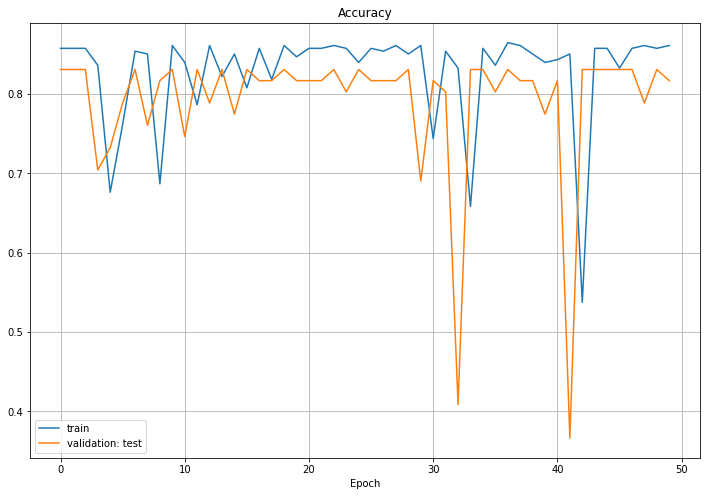

In [22]:
xs = np.arange(1,len(acc)+1)     # epoch
plt.figure(figsize=(12,8))
plt.plot(acc, ms=5, label='train')
plt.plot(val_acc, ms=5, label='validation: test')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.show()

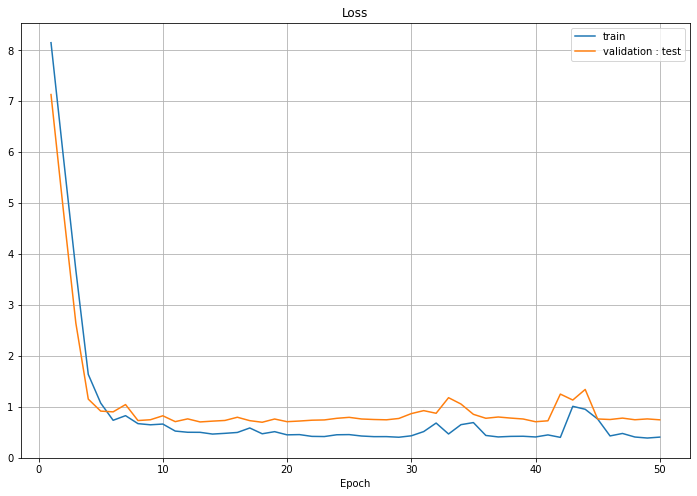

In [23]:
xs = np.arange(1,len(acc)+1)     # epoch
plt.figure(figsize=(12,8))
plt.plot(xs, loss, ms=10, label='train')
plt.plot(xs, val_loss, ms=5, label='validation : test')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

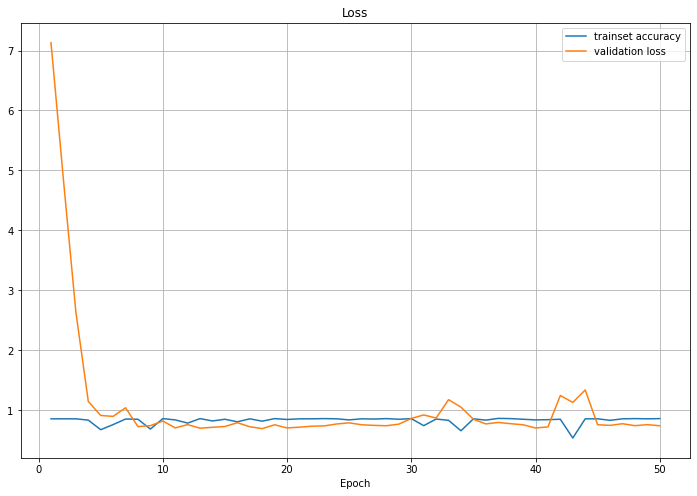

In [24]:
# 실전에서는 accuracy값과 val_loss값 많이 그려진다
xs = np.arange(1,len(acc)+1)     # epoch
plt.figure(figsize=(12,8))
plt.plot(xs, acc, ms=10, label='trainset accuracy')
plt.plot(xs, val_loss, ms=10, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.title('Loss')
plt.show()

In [29]:
# 웨이꺼 확인 좀 grid 라던지

In [25]:
min(val_loss)

0.6945070028305054

어큐러시 증가 과적하바이 일어나는 거라하는데?

즉 과적합은 트레인 셋에 대해서 정확도가 계속 올라간다. 

암기한다 = 일반성? 일관성은 떨어져 
